In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import  model_selection

In [2]:
data = pd.DataFrame (pd.read_csv (r'C:\Users\admin\ML_Project\Churn_Modelling.csv'))

In [3]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
data.drop (['CustomerId', 'Surname', 'RowNumber'], axis =1, inplace = True)

In [6]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [8]:
values = data.values

In [9]:
def data_clean (column):
    prepare = preprocessing.LabelEncoder()
    prepare.fit (values[:, column])
    return prepare.transform (values[:, column])
# a function to turn non-numerical data in to numerical

In [10]:
values [:, 1] = data_clean (1)
values [:, 2] = data_clean (2)

In [11]:
values

array([[619, 0, 0, ..., 1, 101348.88, 1],
       [608, 2, 0, ..., 1, 112542.58, 0],
       [502, 0, 0, ..., 0, 113931.57, 1],
       ...,
       [709, 0, 0, ..., 1, 42085.58, 1],
       [772, 1, 1, ..., 0, 92888.52, 1],
       [792, 0, 0, ..., 0, 38190.78, 0]], dtype=object)

In [12]:
#type of values is 'object', then I have to change it to numbers

In [13]:
values = values.astype ('float64')

In [14]:
values.dtype  #float type

dtype('float64')

## Accuracy Score

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [16]:
models = []
models.append (('Logistic Regression', LogisticRegression()))
models.append(('KNeighbors Classifier', KNeighborsClassifier()))
models.append (('Linear Discriminant Analysis', LinearDiscriminantAnalysis()))
models.append (('Gaussian NB', GaussianNB()))
#models.append (('SVM', SVC()))
models.append (('Decision Tree Classifier', DecisionTreeClassifier ()))

In [17]:
X = values [:, 0:10]
Y = values [:, 10]

In [18]:
for name, model in models:
    kfold = model_selection.KFold (n_splits = 10)
    results = model_selection.cross_val_score (model, X, Y, cv = kfold)
    print (name, results.mean())

Logistic Regression 0.7898
KNeighbors Classifier 0.7649999999999999
Linear Discriminant Analysis 0.8049999999999999
Gaussian NB 0.7833
Decision Tree Classifier 0.7917


## Decision Tree Classifier

In [19]:
x_train, x_test, y_train, y_test = model_selection.train_test_split (X, Y, test_size = 0.15)

In [20]:
tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)

In [21]:
tree.fit (x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [22]:
y_predict = tree.predict (x_test)

In [23]:
print (tree.score (x_test, y_test))

0.8406666666666667


In [24]:
from sklearn import metrics

In [25]:
print (metrics.accuracy_score(y_predict, y_test))

0.8406666666666667


In [26]:
featurename = data.columns [0:10]
classname = np.unique ([data.iloc [:, 10]]).astype('str')


In [27]:
from sklearn.tree import plot_tree

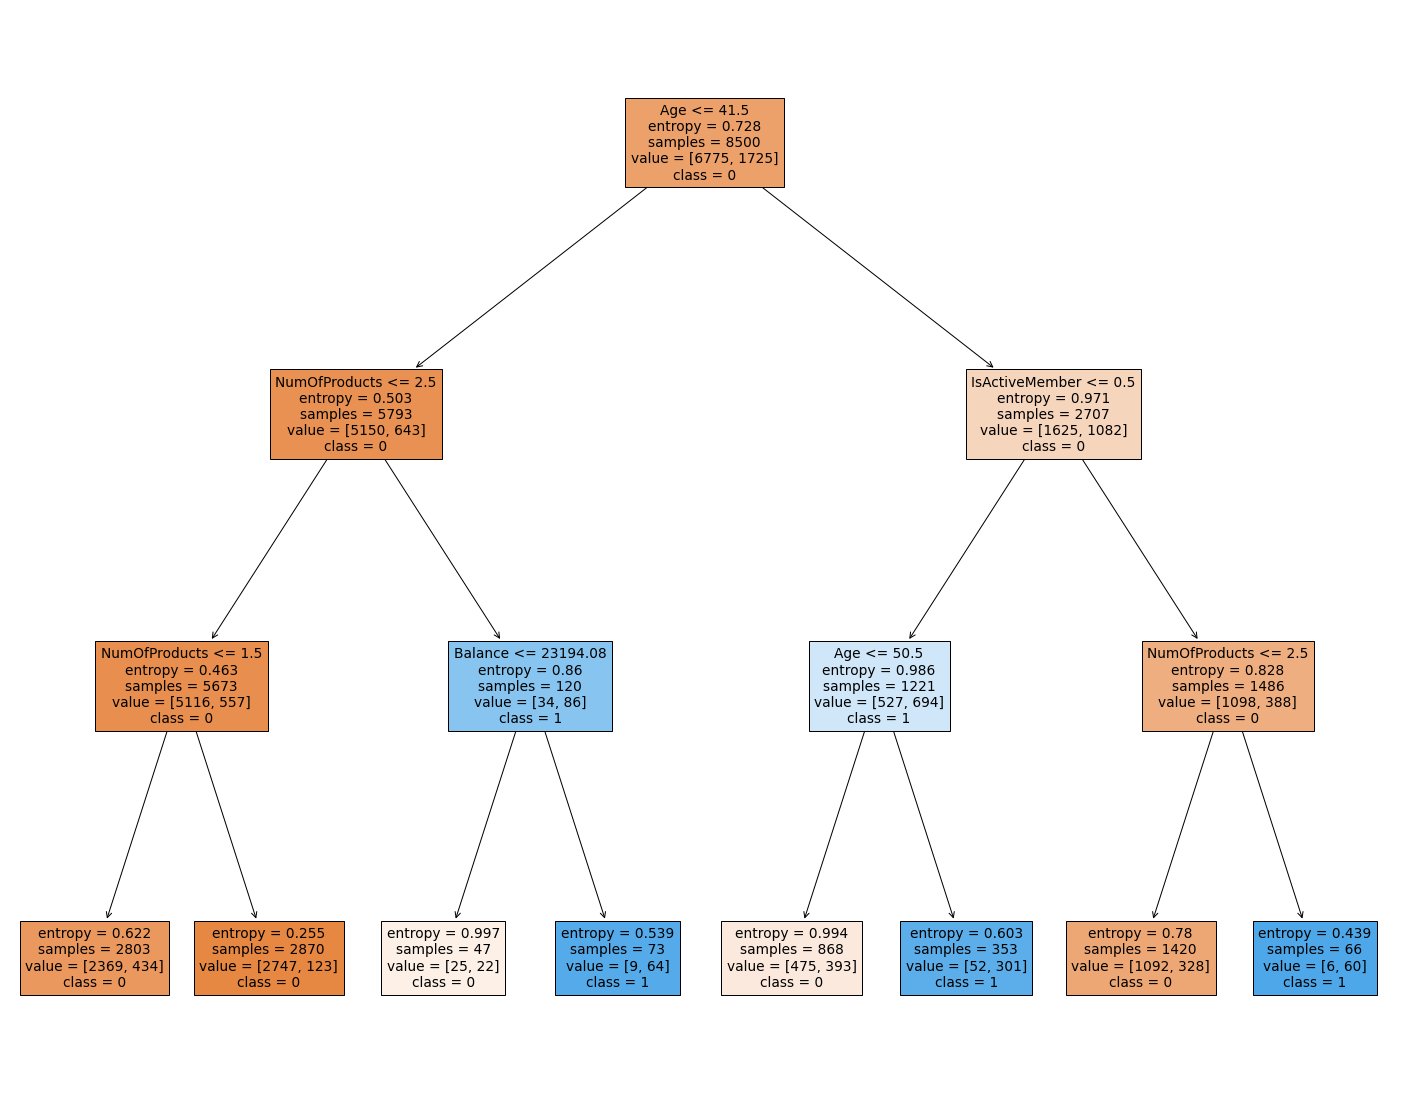

In [28]:
fig = plt.figure(figsize=(25,20))
_ = plot_tree(tree, feature_names = featurename, class_names = classname, filled = True)

## KNN Classifier

In [29]:
knn = KNeighborsClassifier(weights = 'distance') ## nearer points have more influence

In [30]:
knn.fit (x_train, y_train)

KNeighborsClassifier(weights='distance')

In [31]:
metrics.accuracy_score (knn.predict (x_test), y_test)

0.742

In [32]:
knn.score (x_test, y_test)

0.742

In [33]:
print (X[:, 9].std())

57507.617221165565


In [34]:
# Đoạn này t dùng z-score. kết quả chính xác hơn so với knn thông thường

In [35]:
X_copy = X.copy()

In [36]:
for i in range (10):
    X_copy[:, i] = (X_copy[:, i]-X_copy[:, i].mean(axis = 0))/X_copy[:, i].std(axis = 0)

In [37]:
X_copy

array([[-0.32622142, -0.90188624, -1.09598752, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-0.44003595,  1.51506738, -1.09598752, ..., -1.54776799,
         0.97024255,  0.21653375],
       [-1.53679418, -0.90188624, -1.09598752, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 0.60498839, -0.90188624, -1.09598752, ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 1.25683526,  0.30659057,  0.91241915, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 1.46377078, -0.90188624, -1.09598752, ...,  0.64609167,
        -1.03067011, -1.07636976]])

In [38]:
x_train, x_test, y_train, y_test = model_selection.train_test_split (X_copy, Y, test_size = 0.15)

In [39]:
knn.fit (x_train, y_train)

KNeighborsClassifier(weights='distance')

In [40]:
knn.score (x_test, y_test)

0.8246666666666667

In [41]:
knn.predict_proba(x_test)

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       ...,
       [1.        , 0.        ],
       [0.68255827, 0.31744173],
       [0.2056854 , 0.7943146 ]])

## ROC AND AUC

In [43]:
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
models

0.7486953063714809
0.766743114268282
0.7523724178506057
0.8003001612481477
0.6650287631831256


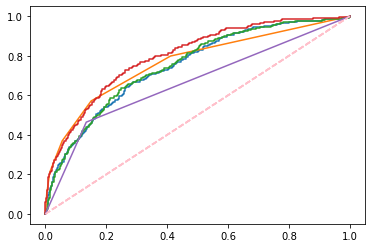

In [58]:
for name, model in models:
    model.fit (x_train, y_train)
    print(roc_auc_score(y_test, model.predict_proba (x_test)[:, 1]))
    t, f, threshold = roc_curve (y_test, model.predict_proba (x_test)[:, 1])
    plt.plot (t,f)
    plt.plot (np.array ([0, 1]), np.array ([0,1]), 'r--', color = 'pink')
plt.show()